In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from alexnet import AlexNet

import os 
import cv2
import urllib
import requests
import PIL.Image
import numpy as np
from bs4 import BeautifulSoup

In [3]:
# Set up the GPU growth to avoid the sudden stop of the runtime. 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
# It has pre-defined two classes including bike and ship. 
EPOCHS = 100
BATCH_SIZE = 32
image_width = 227
image_height = 227
channels = 3
num_classes = 2

In [ ]:
# Get the ship synset
page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")
soup = BeautifulSoup(page.content, 'html.parser')

# Get the bicycle synset
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')

str_soup=str(soup)
split_urls=str_soup.split('\r\n')

bikes_str_soup=str(bikes_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')

In [4]:
# Create the respective directories
path1 = os.makedirs('/home/mike/Documents/Alexnet_Callback/content/train', mode=0o777)
path2 = os.makedirs('/home/mike/Documents/Alexnet_Callback/content/train/ships', mode=0o777)
path3 = os.makedirs('/home/mike/Documents/Alexnet_Callback/content/train/bikes', mode=0o777)
path4 = os.makedirs('/home/mike/Documents/Alexnet_Callback/content/validation', mode=0o777)
path5 = os.makedirs('/home/mike/Documents/Alexnet_Callback/content/validation/ships', mode=0o777)
path6 = os.makedirs('/home/mike/Documents/Alexnet_Callback/content/validation/bikes', mode=0o777)

In [6]:
# Change the original images dimentions to 32 x 32.
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

In [7]:
# Download and preprocess the images.  
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    
    return image

num_of_training_images=100
for progress in range(num_of_training_images):
    if not split_urls[progress] == None:
        try:
            img = url_to_image(split_urls[progress])
            if (len(img.shape))==3:
                save_path = '/home/mike/Documents/Alexnet_Callback/content/train/ships/img'+str(progress)+'.jpg'
                cv2.imwrite(save_path,img)
        except:
            None

for progress in range(num_of_training_images):
    if not bikes_split_urls[progress] == None:
        try:
            img = url_to_image(bikes_split_urls[progress])
            if (len(img.shape))==3:
                save_path = '/home/mike/Documents/Alexnet_Callback/content/train/bikes/img'+str(progress)+'.jpg'
                cv2.imwrite(save_path,img)
        except:
            None

num_of_validation_images=50
for progress in range(num_of_validation_images):
    if not split_urls[progress] == None:
        try:
            img = url_to_image(split_urls[num_of_training_images+progress])
            if (len(img.shape))==3:
                save_path = '/home/mike/Documents/Alexnet_Callback/content/validation/ships/img'+str(progress)+'.jpg'
                cv2.imwrite(save_path,img)
        except:
            None

for progress in range(num_of_validation_images):
    if not bikes_split_urls[progress] == None:
        try:
            img = url_to_image(bikes_split_urls[num_of_training_images+progress])
            if (len(img.shape))==3:
                save_path = '/home/mike/Documents/Alexnet_Callback/content/validation/bikes/img'+str(progress)+'.jpg'
                cv2.imwrite(save_path,img)
        except:
            None

In [8]:
# List the arrays for the two classes in both train and validation datasets.  
array1 = os.listdir('/home/mike/Documents/Alexnet_Callback/content/train/ships')
array2 = os.listdir('/home/mike/Documents/Alexnet_Callback/content/train/bikes')
array3 = os.listdir('/home/mike/Documents/Alexnet_Callback/content/validation/ships')
array4 = os.listdir('/home/mike/Documents/Alexnet_Callback/content/validation/bikes')

In [9]:
# Add the print function to show the results of images ended with jpg
print(array1, array2, array3, array4)

['img55.jpg', 'img26.jpg', 'img52.jpg', 'img24.jpg', 'img78.jpg', 'img43.jpg', 'img31.jpg', 'img15.jpg', 'img6.jpg', 'img94.jpg', 'img62.jpg', 'img73.jpg', 'img93.jpg', 'img63.jpg', 'img8.jpg', 'img47.jpg', 'img14.jpg', 'img49.jpg', 'img12.jpg', 'img54.jpg', 'img4.jpg', 'img5.jpg', 'img33.jpg', 'img32.jpg', 'img17.jpg', 'img11.jpg', 'img16.jpg', 'img72.jpg', 'img86.jpg', 'img18.jpg', 'img96.jpg', 'img74.jpg', 'img46.jpg', 'img69.jpg', 'img51.jpg', 'img99.jpg', 'img25.jpg', 'img77.jpg', 'img59.jpg', 'img28.jpg', 'img3.jpg', 'img56.jpg', 'img76.jpg', 'img67.jpg', 'img91.jpg', 'img92.jpg', 'img95.jpg', 'img60.jpg', 'img40.jpg', 'img23.jpg', 'img66.jpg', 'img34.jpg', 'img64.jpg', 'img0.jpg', 'img97.jpg', 'img48.jpg', 'img39.jpg', 'img83.jpg', 'img35.jpg', 'img29.jpg'] ['img65.jpg', 'img26.jpg', 'img70.jpg', 'img37.jpg', 'img78.jpg', 'img43.jpg', 'img87.jpg', 'img31.jpg', 'img19.jpg', 'img89.jpg', 'img15.jpg', 'img84.jpg', 'img6.jpg', 'img10.jpg', 'img73.jpg', 'img93.jpg', 'img45.jpg', 'img

In [10]:
# It calls the alexnet model in alexnet.py
model = AlexNet((image_width,image_height,channels), num_classes)

In [11]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# It will output the AlexNet model after executing the command 
model.summary()

Model: "alex_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       884

In [13]:
# Designate the directories for training, validation and model saved. 
train_dir = '/home/mike/Documents/Alexnet_Callback/content/train'
valid_dir = '/home/mike/Documents/Alexnet_Callback/content/validation'
model_dir = '/home/mike/Documents/Alexnet_Callback/content/my_model.h5'

In [14]:
# Assign both the image and the diretory generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical")

# The terminal shows the number of images belonging to 2 classes. 
train_num = train_generator.samples
valid_num = valid_generator.samples

Found 118 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [15]:
# Start Tensorboard --logdir logs/fit
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

In [16]:
# Set up the verbose=1 (or verbose=1) for visible (or invisible) epochs. 
model.fit(train_generator,
          epochs=EPOCHS,
          steps_per_epoch=train_num//BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_num//BATCH_SIZE,
          callbacks=callback_list,
          verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 275ms/step - loss: 14.2715 - accuracy: 0.5208 - val_loss: 0.6868 - val_accuracy: 0.5312
Epoch 2/100
3/3 [==============================] - 1s 199ms/step - loss: 0.6982 - accuracy: 0.5581 - val_loss: 0.6920 - val_accuracy: 0.5156
Epoch 3/100
3/3 [==============================] - 1s 257ms/step - loss: 0.6958 - accuracy: 0.4767 - val_loss: 0.6927 - val_accuracy: 0.5312
Epoch 4/100
3/3 [==============================] - 1s 252ms/step - loss: 0.6935 - accuracy: 0.4767 - val_loss: 0.6931 - val_accuracy: 0.4844
Epoch 5/100
3/3 [==============================] - 1s 283ms/step - loss: 0.6938 - accuracy: 0.4271 - val_loss: 0.6937 - val_accuracy: 0.4531
Epoch 6/100
3/3 [==============================] - 1s 285ms/step - loss: 0.6922 - accuracy: 0.5465 - val_loss: 0.6924 - val_accuracy: 0.4688
Epoch 7/100
3/3 [==============================] - 1s 248ms/step - loss: 0.7045 - accuracy: 0.4651 - val_loss: 0.6932 - val_accuracy: 0.4688
Epoch 8/100


Epoch 59/100
3/3 [==============================] - 1s 241ms/step - loss: 0.4823 - accuracy: 0.7558 - val_loss: 0.5554 - val_accuracy: 0.7031
Epoch 60/100
3/3 [==============================] - 1s 244ms/step - loss: 0.5415 - accuracy: 0.7558 - val_loss: 0.4212 - val_accuracy: 0.7969
Epoch 61/100
3/3 [==============================] - 1s 278ms/step - loss: 0.4765 - accuracy: 0.8021 - val_loss: 0.4863 - val_accuracy: 0.7969
Epoch 62/100
3/3 [==============================] - 1s 278ms/step - loss: 0.5588 - accuracy: 0.7907 - val_loss: 0.6053 - val_accuracy: 0.7500
Epoch 63/100
3/3 [==============================] - 1s 243ms/step - loss: 0.5623 - accuracy: 0.7442 - val_loss: 0.4578 - val_accuracy: 0.7344
Epoch 64/100
3/3 [==============================] - 1s 241ms/step - loss: 0.5244 - accuracy: 0.6977 - val_loss: 0.5143 - val_accuracy: 0.7812
Epoch 65/100
3/3 [==============================] - 1s 269ms/step - loss: 0.5830 - accuracy: 0.6979 - val_loss: 0.5824 - val_accuracy: 0.6406
Epoch 

In [17]:
# The system saves the whole model into the direcotry: /home/mike/Documents/AlexNet-tf2/content. The 
# model of my_model.h5 has the quite big size of 748.6 MB. 
model.save(model_dir)

In [18]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 7229), started 0:01:42 ago. (Use '!kill 7229' to kill it.)

In [19]:
# To view the diagrams, users need to upload the Python script into Jupyter Notebook and run the 
# the script or directly upload and run the original ipython script. 
class_names = ['bike', 'ship']
x_valid, label_batch  = next(iter(valid_generator))
prediction_values = model.predict_classes(x_valid)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


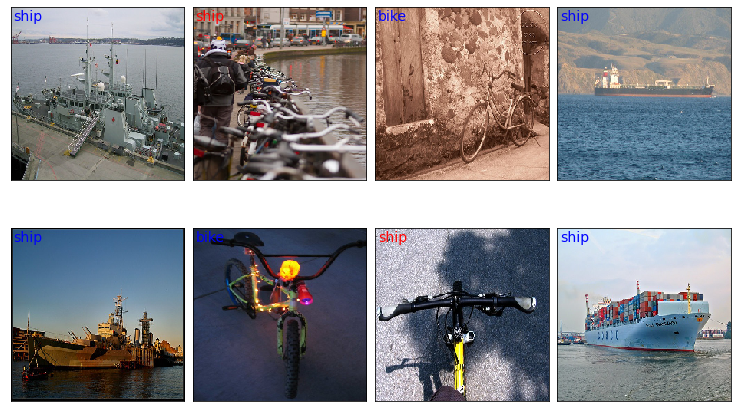

In [20]:
# The plot will be realized in the Jupyter Notebook after running the script in either Python or 
# ipython. 
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the images: each image is 227x227 pixels
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(x_valid[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        # Label the image with the blue text
        ax.text(3, 17, class_names[prediction_values[i]], color='blue', fontsize=14)
    else:
        # Label the image with the red text
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)